In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split


In [12]:
df=pd.read_csv('flipkart_review.csv')
print(df.shape)
df=df.head(5000)
df.head()


(203167, 5)


/var/folders/lk/48f86xjs44b7fyb5w_kzxfn00000gn/T/ipykernel_14288/2350136431.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('flipkart_review.csv')


,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product


In [13]:
df=pd.read_csv('flipkart_review.csv')
print(df.shape)
df=df.head(20000)
df.head()


(203167, 5)


/var/folders/lk/48f86xjs44b7fyb5w_kzxfn00000gn/T/ipykernel_14288/3492711319.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('flipkart_review.csv')


,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product


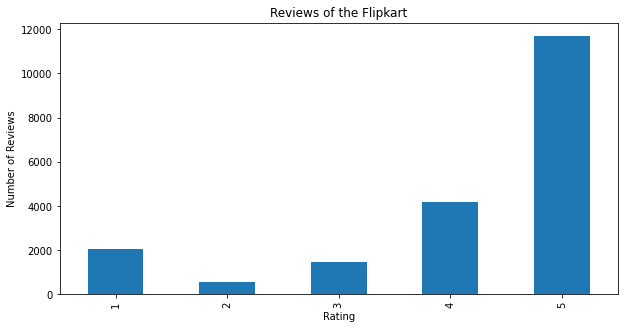

In [14]:
ax = df['Rate'].value_counts().sort_index().plot(kind='bar', 
      title='Reviews of the Flipkart',
      figsize=(10,5))
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews')
plt.show()

In [15]:
ax = df['Summary'].value_counts().sort_index().plot(kind='bar', 
      title='Reviews of the Flipkart',
      figsize=(10,5))
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews')
plt.show()

KeyboardInterrupt: 

In [49]:
##BASKIC NLTK


## Basic NLTK


In [19]:
example = df['Summary'][0]
print(example)

great cooler excellent air flow and for this price its so amazing and unbelievablejust love it


In [20]:
from nltk.tokenize import RegexpTokenizer

In [21]:
import nltk
nltk.word_tokenize(example)

['great',
 'cooler',
 'excellent',
 'air',
 'flow',
 'and',
 'for',
 'this',
 'price',
 'its',
 'so',
 'amazing',
 'and',
 'unbelievablejust',
 'love',
 'it']

In [22]:
tokens = nltk.word_tokenize(example)
print(tokens)

['great', 'cooler', 'excellent', 'air', 'flow', 'and', 'for', 'this', 'price', 'its', 'so', 'amazing', 'and', 'unbelievablejust', 'love', 'it']


In [23]:
nltk.pos_tag(tokens)

[('great', 'JJ'),
 ('cooler', 'NN'),
 ('excellent', 'JJ'),
 ('air', 'NN'),
 ('flow', 'NN'),
 ('and', 'CC'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('price', 'NN'),
 ('its', 'PRP$'),
 ('so', 'IN'),
 ('amazing', 'JJ'),
 ('and', 'CC'),
 ('unbelievablejust', 'JJ'),
 ('love', 'NN'),
 ('it', 'PRP')]

In [24]:
entiites = nltk.chunk.ne_chunk(nltk.pos_tag(tokens))
print(entiites)
entiites.pprint()

(S
  great/JJ
  cooler/NN
  excellent/JJ
  air/NN
  flow/NN
  and/CC
  for/IN
  this/DT
  price/NN
  its/PRP$
  so/IN
  amazing/JJ
  and/CC
  unbelievablejust/JJ
  love/NN
  it/PRP)
(S
  great/JJ
  cooler/NN
  excellent/JJ
  air/NN
  flow/NN
  and/CC
  for/IN
  this/DT
  price/NN
  its/PRP$
  so/IN
  amazing/JJ
  and/CC
  unbelievablejust/JJ
  love/NN
  it/PRP)


## VADER FOR SENTIMENT ANALYSIS

We will use this as this removes the stop words and also the words are scored and combined to a total score

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [27]:
sia.polarity_scores('i Love NLP')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [28]:
print(example)

great cooler excellent air flow and for this price its so amazing and unbelievablejust love it


## Scores -1>=0; Negative above 0.5 is Positive 

In [29]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'compound': 0.9576}

## Run the polarity for enitre data set

In [30]:
## Iterate over the rows of the dataframe and get the sentiment score

res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row['Review']
    myid = row['Summary']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [31]:
res[i]

{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5256}

In [32]:
res

{0: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.636},
 1: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 2: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182},
 3: {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215},
 4: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182},
 5: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 6: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2716},
 7: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263},
 10: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2716},
 13: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859},
 14: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

In [33]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.000,1.000,0.6360
1,0.000,0.000,1.000,0.6249
2,0.000,0.000,1.000,0.3182
3,0.737,0.263,0.000,-0.4215
4,0.000,0.000,1.000,0.3182
...,...,...,...,...
19995,0.000,0.256,0.744,0.4404
19996,0.000,0.000,1.000,0.5859
19997,0.000,0.000,1.000,0.4215
19998,0.000,1.000,0.000,0.0000


In [34]:
results_df = pd.DataFrame(res).T
results_df.reset_index().rename(columns={'index':'id'})
results_df = results_df.merge(df, how='left', left_index=True, right_index=True)

In [35]:
results_df

,neg,neu,pos,compound,product_name,product_price,Rate,Review,Summary
0,0.000,0.000,1.000,0.6360,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,0.000,0.000,1.000,0.6249,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,0.000,0.000,1.000,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,0.737,0.263,0.000,-0.4215,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,0.000,0.000,1.000,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product
...,...,...,...,...,...,...,...,...,...
19995,0.000,0.256,0.744,0.4404,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,5,classy product,good product power ful performance
19996,0.000,0.000,1.000,0.5859,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,4,delightful,got wide range of air expansion speed is quite...
19997,0.000,0.000,1.000,0.4215,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,3,nice,some noise inside the fan during while running
19998,0.000,1.000,0.000,0.0000,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,3,decent product,perusa solradhuku onnum illaing


In [36]:
results_df.head()

,neg,neu,pos,compound,product_name,product_price,Rate,Review,Summary
0,0.000,0.000,1.0,0.6360,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,0.000,0.000,1.0,0.6249,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,0.000,0.000,1.0,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,0.737,0.263,0.0,-0.4215,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,0.000,0.000,1.0,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product


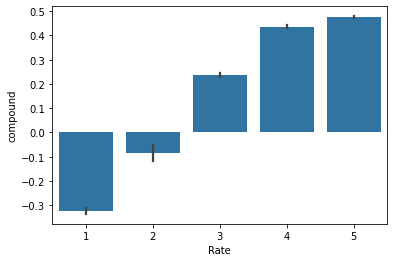

In [37]:
sns.barplot(x='Rate', y='compound', data=results_df)
ax.set_xlabel('Rating')
plt.show()

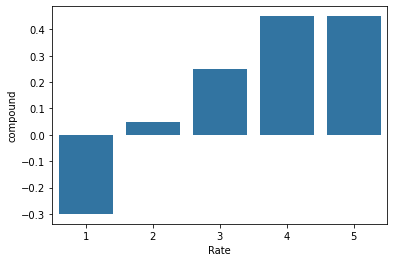

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
import pandas as pd
data = pd.DataFrame({
    "Rate": [5, 3, 1, 4, 2],
    "compound": [0.45, 0.25, -0.3, 0.45, 0.05]
})

# Plot with ordered Rate
sns.barplot(x="Rate", y="compound", data=data, order=[1, 2, 3, 4, 5])

# Show plot
plt.show()

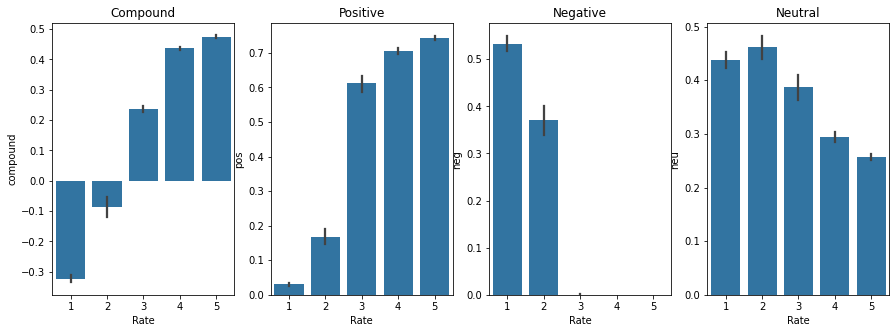

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

data = pd.DataFrame({
    "Rate": [1, 2, 3, 4, 5],
    "compound": [0.45, 0.25, -0.3, 0.45, 0.05]
})
sns.barplot(x='Rate', y='compound', data=results_df, ax=axs[0])

data = pd.DataFrame({
    "Rate": [5, 3, 1, 4, 2],
    "pos": [0.45, 0.25, -0.3, 0.45, 0.05]
})
sns.barplot(x='Rate', y='pos', data=results_df, ax=axs[1])

data = pd.DataFrame({
    "Rate": [5, 3, 1, 4, 2],
    "neg": [0.45, 0.25, -0.3, 0.45, 0.05]
})
sns.barplot(x='Rate', y='neg', data=results_df, ax=axs[2])

data = pd.DataFrame({
    "Rate": [5, 3, 1, 4, 2],
    "neu": [0.45, 0.25, -0.3, 0.45, 0.05]
})
sns.barplot(x='Rate', y='neu', data=results_df, ax=axs[3])

axs[0].set_title('Compound')
axs[1].set_title('Positive')
axs[2].set_title('Negative')
axs[3].set_title('Neutral')

plt.show()

In [40]:
results_df

,neg,neu,pos,compound,product_name,product_price,Rate,Review,Summary
0,0.000,0.000,1.000,0.6360,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,0.000,0.000,1.000,0.6249,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,0.000,0.000,1.000,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,0.737,0.263,0.000,-0.4215,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,0.000,0.000,1.000,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product
...,...,...,...,...,...,...,...,...,...
19995,0.000,0.256,0.744,0.4404,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,5,classy product,good product power ful performance
19996,0.000,0.000,1.000,0.5859,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,4,delightful,got wide range of air expansion speed is quite...
19997,0.000,0.000,1.000,0.4215,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,3,nice,some noise inside the fan during while running
19998,0.000,1.000,0.000,0.0000,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,3,decent product,perusa solradhuku onnum illaing


In [41]:
data

,Rate,neu
0,5,0.45
1,3,0.25
2,1,-0.30
3,4,0.45
4,2,0.05


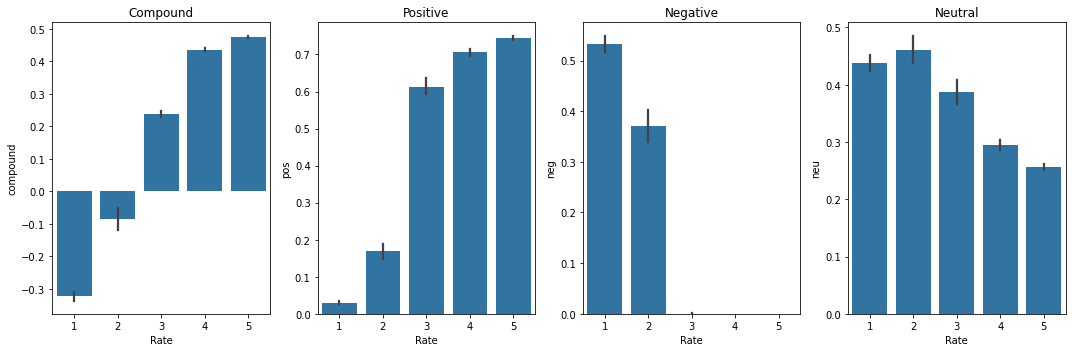

In [42]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
sns.barplot(x='Rate', y='compound', data=results_df, ax=axs[0])
sns.barplot(x='Rate', y='pos', data=results_df, ax=axs[1])
sns.barplot(x='Rate', y='neg', data=results_df, ax=axs[2])
sns.barplot(x='Rate', y='neu', data=results_df, ax=axs[3])
axs[0].set_title('Compound')
axs[1].set_title('Positive')    
axs[2].set_title('Negative')
axs[3].set_title('Neutral')
plt.tight_layout()
plt.show()

In [43]:
results_df

,neg,neu,pos,compound,product_name,product_price,Rate,Review,Summary
0,0.000,0.000,1.000,0.6360,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,0.000,0.000,1.000,0.6249,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,0.000,0.000,1.000,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,0.737,0.263,0.000,-0.4215,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,0.000,0.000,1.000,0.3182,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product
...,...,...,...,...,...,...,...,...,...
19995,0.000,0.256,0.744,0.4404,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,5,classy product,good product power ful performance
19996,0.000,0.000,1.000,0.5859,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,4,delightful,got wide range of air expansion speed is quite...
19997,0.000,0.000,1.000,0.4215,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,3,nice,some noise inside the fan during while running
19998,0.000,1.000,0.000,0.0000,BAJAJ Crest Neo 1200 mm 3 Blade Ceiling Fan???...,1329,3,decent product,perusa solradhuku onnum illaing


## RoBerta Pretrained Model

* Use a model trained of a large corpus of data.
* Transformer model accounts for the words but also the context related to other words

In [44]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [45]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [46]:
#VADERS RESULT ON EXAMPLE

print(example)
sia.polarity_scores(example)

great cooler excellent air flow and for this price its so amazing and unbelievablejust love it


{'neg': 0.0, 'neu': 0.416, 'pos': 0.584, 'compound': 0.9576}

## USING ROBERTA FOR THE ANALYSIS


    

In [47]:
# Run for Roberta Model 

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', padding=True)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)    
    scores_dict = {
        'RoBERTa_neg' : scores[0],
        'RoBERTa_neu' : scores[1],
        'RoBERTa_pos' : scores[2]
    }
    return(scores_dict)

In [48]:
print(polarity_scores_roberta(example))

{'RoBERTa_neg': np.float32(0.0022809221), 'RoBERTa_neu': np.float32(0.006253415), 'RoBERTa_pos': np.float32(0.9914657)}


In [49]:
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row['Review']
    myid = row['Summary']
    vader_result = sia.polarity_scores(text)  
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
try:
    # Some code that might raise RuntimeError
    raise RuntimeError("An error occurred")  # Example error
except RuntimeError:
    print(f'Error for {myid}')  
    

  0%|          | 0/20000 [00:00<?, ?it/s]

Error for bad productfan spreed is too loweveryone not buying this product


In [166]:
results_df = pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'id'})
results_df = results_df.merge(df, how='left', left_index=True, right_index=True)
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,RoBERTa_neg,RoBERTa_neu,RoBERTa_pos,product_name,product_price,Rate,Review,Summary
0,great cooler excellent air flow and for this p...,0.000,0.000,1.0,0.6360,0.017081,0.200407,0.782512,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,best budget 2 fit cooler nice cooling,0.000,0.000,1.0,0.6249,0.023495,0.196776,0.779729,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,the quality is good but the power of air is de...,0.000,0.000,1.0,0.3182,0.216328,0.558421,0.225251,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,very bad product its a only a fan,0.737,0.263,0.0,-0.4215,0.948854,0.044869,0.006276,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,ok ok product,0.000,0.000,1.0,0.3182,0.216328,0.558421,0.225251,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product


In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# from tqdm.notebook import tqdm 

# sia = SentimentIntensityAnalyzer()
# sia.polarity_scores('Hi how are you')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## COMPARE FOR BOTH THE MODELS



In [167]:
results_df.columns


Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'RoBERTa_neg', 'RoBERTa_neu', 'RoBERTa_pos', 'product_name',
       'product_price', 'Rate', 'Review', 'Summary'],
      dtype='object')

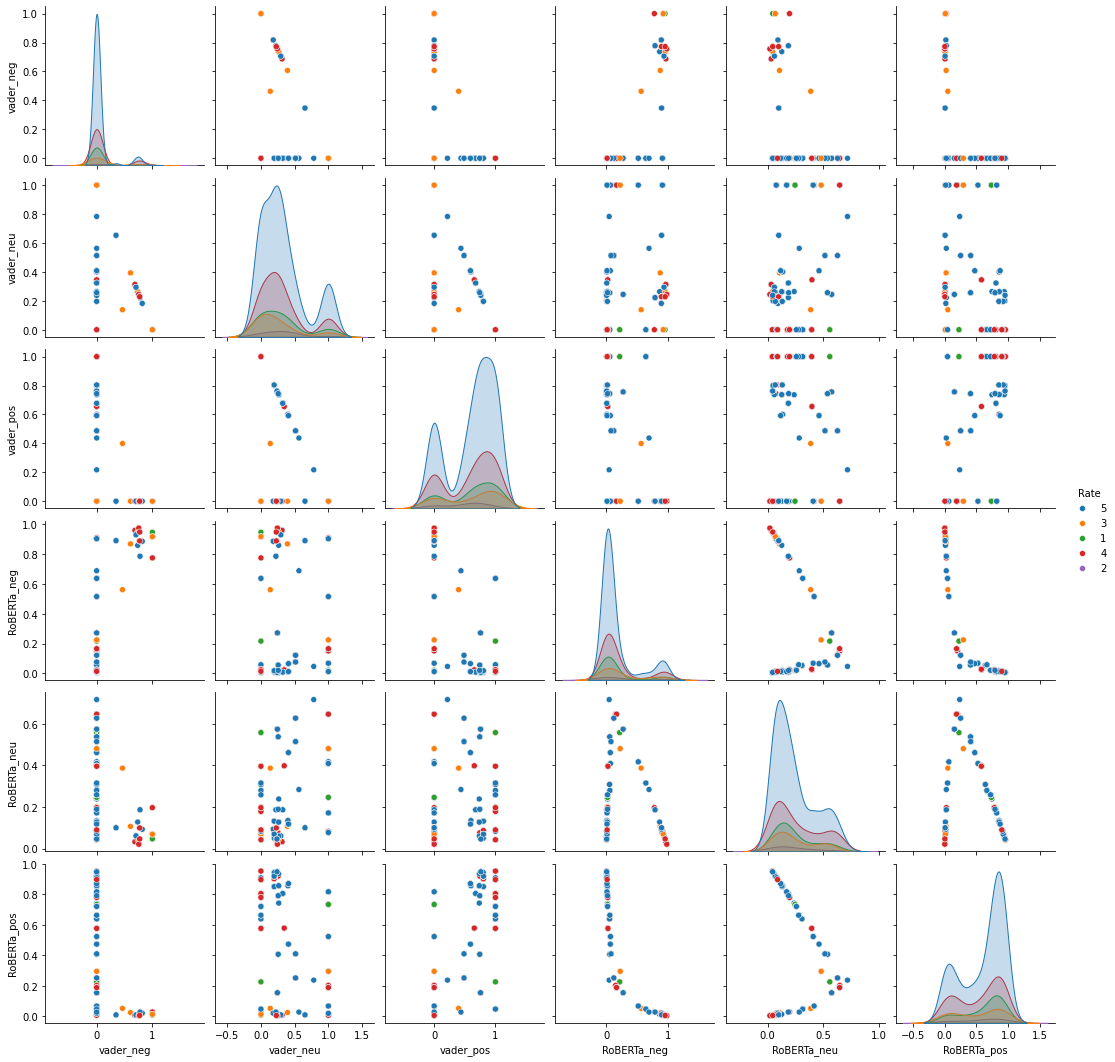

In [168]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
                                    'RoBERTa_neg', 'RoBERTa_neu', 'RoBERTa_pos'],
                                    hue='Rate', palette='tab10')

plt.show()

## REVIEW EXAMPLES 


In [189]:
results_df['Rate'] = results_df['Rate'].astype(int)

In [190]:
results_df.query('Rate == 1')\
    .sort_values('RoBERTa_neg', ascending=False)['Summary'].values[0]

'very bad product its a only a fan'

In [193]:
results_df.query('Rate == 1')\
    .sort_values('vader_pos', ascending=False)['Summary'].values[0]

'worst model all user please dont buy'

In [199]:
# Negative sentiment with 5 star review
results_df.query('Rate == 5')\
    .sort_values('RoBERTa_neg', ascending=False)['Summary'].values[0]

'wonderful product can go for it'

In [195]:
# Negative sentiment with 5 star review
results_df.query('Rate == 5')\
    .sort_values('vader_neg', ascending=False)['Summary'].values[0]

'its a big coolerair throw is good cooling is also good build material is sturdy water inlet shuld be little bit big overall i am satisfied with the product'

In [ ]:
filtered_df = results_df.query
('Rate == 1')

if filtered_df.empty:
    print("No matching rows found for Rate == 1")
else:
    review_text = filtered_df.sort_values('RoBERTa_neg', ascending=False)['Summary'].values[0]
    print(review_text)

No matching rows found for Rate == 1


In [200]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [201]:
sent_pipeline("I hate you")

[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [202]:
def classify_sentiment(value):
    if value > 0.5:  # Adjust threshold as needed
        return "pos"
    elif value < -0.5:
        return "neg"
    else:
        return "neu"

# Assuming 'RoBERTa_score' is the column with sentiment scores
results_df["Sentiment Analysis"] = results_df["RoBERTa_neg"].apply(classify_sentiment)

# Check if the column is added
print(results_df.head())

                                                  id  vader_neg  vader_neu  \
0  great cooler excellent air flow and for this p...      0.000      0.000   
1              best budget 2 fit cooler nice cooling      0.000      0.000   
2  the quality is good but the power of air is de...      0.000      0.000   
3                  very bad product its a only a fan      0.737      0.263   
4                                      ok ok product      0.000      0.000   

   vader_pos  vader_compound  RoBERTa_neg  RoBERTa_neu  RoBERTa_pos  \
0        1.0          0.6360     0.017081     0.200407     0.782512   
1        1.0          0.6249     0.023495     0.196776     0.779729   
2        1.0          0.3182     0.216328     0.558421     0.225251   
3        0.0         -0.4215     0.948854     0.044869     0.006276   
4        1.0          0.3182     0.216328     0.558421     0.225251   

                                        product_name product_price  Rate  \
0  Candes 12 L Room/Personal

In [ ]:
import pandas as pd

# Define sentiment classification function
def classify_sentiment(value):
    if value > 0.5:  # Adjust threshold as needed
        return "pos"
    elif value < -0.5:
        return "neg"
    else:
        return "neu"

# Apply function to create the "Sentiment Analysis" column
results_df["Sentiment Analysis"] = results_df["RoBERTa_neg"].apply(classify_sentiment)

# Save the modified DataFrame to a CSV file
csv_filename = "flipkart_sent.csv"
results_df.to_csv(csv_filename, index=False)

print(f"File saved as {csv_filename}")

File saved as results_with_sentiment.csv
